# Atividade avaliativa

Leia atentamente as instruções de cada questão, e responda completamente.

Para o inicio da atividade, execute o seguinte trecho de código:


In [4]:
!pip install requests

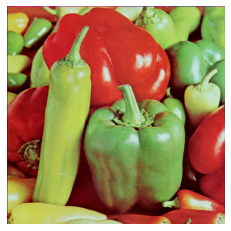

In [147]:
import matplotlib.pyplot as plt
from PIL import Image
from numpy import array, mean
import requests
import numpy as np
from io import BytesIO

response = requests.get('https://homepages.cae.wisc.edu/~ece533/images/peppers.png')
img = Image.open(BytesIO(response.content)).convert()
plt.imshow(img)
plt.axis('off')
plt.show()

A imagem carregada é uma imagem "clássica" no estudo de processamento de imagem e computação gráfica. Temos a imagem colorida, com isto, podemos começar nossa avaliação.

## Atividade 01

Escreva/Implemente o código que plota a imagem em tons de cinza e o histograma da imagem em tons de cinza.

(array([ 72615., 112550.,  87126.,  83631.,  70737.,  67482.,  64360.,
         95053., 114001.,  18877.]),
 array([  0. ,  23.7,  47.4,  71.1,  94.8, 118.5, 142.2, 165.9, 189.6,
        213.3, 237. ]),
 <a list of 10 Patch objects>)

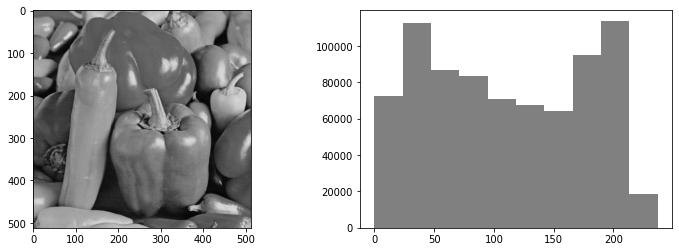

In [201]:
img_arr = np.array(img)

red = img_arr[:,:,0]
green = img_arr[:,:,1]
blue = img_arr[:,:,2]

img_gray = np.mean(img, axis=2)
img_gray_arr = np.array(img)

gray = img_gray_arr[:,:]

plt.figure(figsize=(19,4))
plt.subplot(131)
plt.imshow(Image.fromarray(img_gray))

plt.subplot(132)
plt.hist(gray.ravel(), color='gray')

## Atividade 02

Escreva/Implemente o código que plota a imagem em preto e branco e o histograma da imagem em preto e branco.

(array([164569.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  97575.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

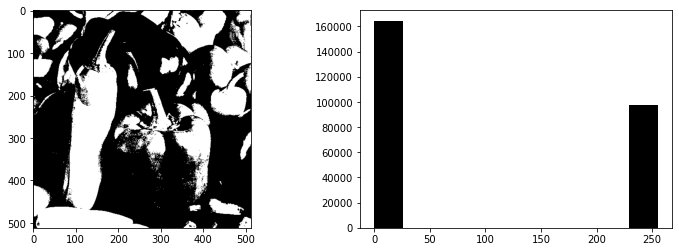

In [203]:
img_black = np.array(img)

img_black = np.mean(img, axis=2)
img_black_arr = np.array(img)

img_black[img_black >= 128] = 255
img_black[img_black < 128] = 0

black = img_black_arr[:,:]

plt.figure(figsize=(19,4))
plt.subplot(131)
plt.imshow(Image.fromarray(img_black))

plt.subplot(132)
plt.hist(img_black.ravel(), color='black')

## Atividade 03

Sobre os histogramas gerados nas atividade 1 e 2, o que podemos concluir? Responda no espaço abaixo.

> É percepitível que, na imagem em tons de cinza, temos no histograma valores em todos os limiares, de 0 à 255, isso por não ser totalmente preto e branca. Já na imagem que foi gerada totalmente P&B, vemos pelo histograma que os valores do limiares só são encontrados em 0 e 255, tornando-se assim uma imagem P&B real.

## Atividade 04

Gere duas imagens negativas, uma utilizando a imagem em preto e branco como base, e a outra a imagem em tons de cinza. Plote as imagem no final.

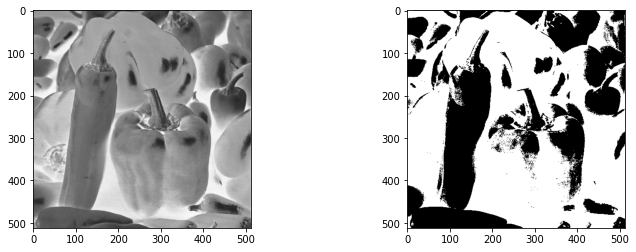

In [205]:
img_black = np.array(img)

img_black = np.mean(img, axis=2)
img_black_arr = np.array(img)

img_black[img_black >= 128] = 255
img_black[img_black < 128] = 0

img_arr = np.array(img)

img_gray = np.mean(img, axis=2)
img_gray_arr = np.array(img)

plt.figure(figsize=(19,4))

plt.subplot(131)
plt.imshow(Image.fromarray(255 - img_gray))

plt.subplot(132)
plt.imshow(Image.fromarray(255 - img_black))

## Atividade 05

Baseado nas imagens acima, o que você destaca?

> Fica aparente, que quando fazemos a versão 'negativa' de ambas as imagens, o que acontece é a própria inversão de cores. Na imagem P&B os limiares 255 se converteram para 0 e os que eram 0 para 255. Na imagem em tons de cinza, ocorreu a mesma coisa, porém com os diversos limiares da imagem.

## Atividade 06

Escreva um código que plote o histograma das 3 cores (RGB) separadas.

(0.0, 70000.0)

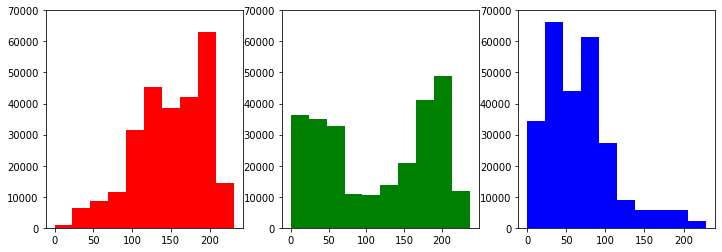

In [209]:
img_arr = np.array(img)

red = img_arr[:,:,0]
green = img_arr[:,:,1]
blue = img_arr[:,:,2]

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.hist(red.ravel(), color='red')
plt.ylim(top=70000)

plt.subplot(132)
plt.hist(green.ravel(), color='green')
plt.ylim(top=70000)

plt.subplot(133)
plt.hist(blue.ravel(), color='blue')
plt.ylim(top=70000)

Baseado no histograma das 3 cores, escreva o que podemos concluir da imagem.

> Visualizamos aqui os canais de cores que são mais frequêntes na imagem. A cor mais forte que da pra perceber pelo histograma é o vermelho e o verde, apesar do canal azul estar em grande quantidade, o limiar em que ele mais aparece é perto de 0 até 100 aproximadamente, já o vermelho e verde são encontrados em grande quantidade mais próximos de 255, tornando assim a cor mais forte na imagem. 

## Atividade 07

Escreva um código que calcule a média dos pixels do canal azul, então, troque todos os valores do canal azul pela média e plote a nova imagem, em versão colorida.

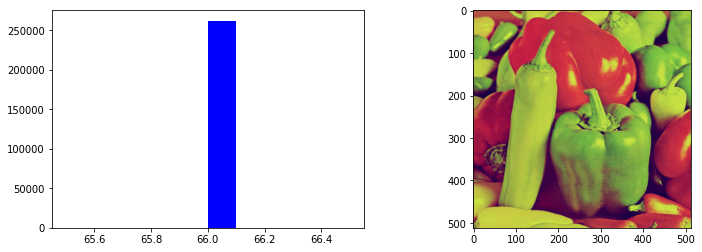

In [215]:
img_arr = np.array(img)

blue = img_arr[:,:,2]
img_arr[:,:,2] = blue.mean()

plt.figure(figsize=(19,4))

plt.subplot(131)
plt.hist(blue.ravel(), color='blue')

plt.subplot(132)
plt.imshow(Image.fromarray(img_arr))

Explique como a imagem da questão 7 foi afetada?

> A imagem é afetada a pelo fato de estarmos mudando os valores do canal azul da imagem. Pegamos a média e substituimos todos os outros limiares do canal azul pelo valor encontrado, fazendo assim com que todos os limiares fossem substituidos pelo da média.